# Data preprocessing

Load dataset

In [72]:
import pandas as pd

PATH = "D:/Documents/MASTER/6.Semester_Ausland/Aberdeen/Aberdeen_Montreal_2018/" 
#file = "Montreal_2018_Competitive_Install.csv"
#file = "Montreal_2018_DynamicData.csv", 
#file = "Montreal_2018_External_Reference.csv", 
file = "Montreal_2018_Install_Likelihood_Score.csv", 
file = "Montreal_2018_IT_Spend.csv", 
file = "Montreal_2018_Product_Install.csv",
#file = "Montreal_2018_Product_Specifications.csv", 
file = "Montreal_2018_Purchase_likelihood_score.csv", 
#file = "Montreal_2018_Site_Description.csv", 
file = "Montreal_2018_Site_Level_Enterprise.csv", 
file = "Montreal_2018_Technology_Totals.csv"
data = pd.read_csv(PATH + , sep="\t")
#data = pd.concat([data, pd.read_csv(PATH + file, sep="\t").sort_values(by = "SITEID")], axis = 1)
data = pd.merge(data, 
                pd.read_csv(PATH + file, sep="\t"), 
                how = "right")
#X_train = data_train[data_train.columns[:-1]]
#y_train = data_train["Income"]
#X_test = pd.read_csv(PATH + "test.csv", skipinitialspace = True, na_values = "?")

In [73]:
data['SITEID'].tail()

14951    209411638
14952    209411827
14953    209411954
14954    209412290
14955    209412957
Name: SITEID, dtype: int64

In [7]:
X_train.head()

,index,Age,Workclass,Final weight,Education,Marital-status,Occupation,Relationship,Sex,Capital-gain,Capital-loss,Hours per week,Native country
0,36721,36,Private,31023,Masters,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,50,United-States
1,2638,52,NaN,159755,Assoc-voc,Married-civ-spouse,NaN,Husband,Male,0,0,50,United-States
2,36214,36,Private,359001,Assoc-voc,Divorced,Craft-repair,Not-in-family,Male,0,0,40,United-States
3,27010,42,Self-emp-inc,188615,Bachelors,Married-civ-spouse,Sales,Husband,Male,0,0,60,United-States
4,27506,44,Private,43711,Bachelors,Never-married,Other-service,Not-in-family,Male,0,0,48,United-States


In [8]:
X_test.head()

,index,Age,Workclass,Final weight,Education,Marital-status,Occupation,Relationship,Sex,Capital-gain,Capital-loss,Hours per week,Native country
0,7762,18,Private,423024.0,HS-grad,Never-married,Other-service,Not-in-family,Male,0.0,0.0,20.0,United-States
1,23881,17,Private,178953.0,12th,Never-married,Sales,Own-child,Female,0.0,0.0,20.0,United-States
2,30507,25,Local-gov,348986.0,HS-grad,Never-married,Handlers-cleaners,Other-relative,Male,0.0,0.0,40.0,United-States
3,28911,20,Private,218215.0,Some-college,Never-married,Sales,Own-child,Female,0.0,0.0,30.0,United-States
4,19484,47,Private,244025.0,HS-grad,Never-married,Machine-op-inspct,Unmarried,Male,0.0,0.0,56.0,Puerto-Rico


In [9]:
y_train.head()

0     >50K.
1      >50K
2    <=50K.
3      >50K
4     <=50K
Name: Income, dtype: object

Check if there is some missing data

In [11]:
for col in X_train:
    n_missing = X_train[col].isna().sum()
    print(col, n_missing, "\n")

index 0 

Age 0 

Workclass 1863 

Final weight 0 

Education 0 

Marital-status 0 

Occupation 1873 

Relationship 0 

Sex 0 

Capital-gain 0 

Capital-loss 0 

Hours per week 0 

Native country 580 



Check the statistical summary of the data 

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32723 entries, 0 to 32722
Data columns (total 13 columns):
index             32723 non-null int64
Age               32723 non-null int64
Workclass         30860 non-null object
Final weight      32723 non-null int64
Education         32723 non-null object
Marital-status    32723 non-null object
Occupation        30850 non-null object
Relationship      32723 non-null object
Sex               32723 non-null object
Capital-gain      32723 non-null int64
Capital-loss      32723 non-null int64
Hours per week    32723 non-null int64
Native country    32143 non-null object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [13]:
X_train.describe(include = 'object')

,Workclass,Education,Marital-status,Occupation,Relationship,Sex,Native country
count,30860,32723,32723,30850,32723,32723,32143
unique,8,16,7,14,6,2,40
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Male,United-States
freq,22734,10569,14971,4187,13188,21926,29384


In [14]:
X_train.describe(include = ['int64'])

,index,Age,Final weight,Capital-gain,Capital-loss,Hours per week
count,32723.000000,32723.000000,3.272300e+04,32723.000000,32723.000000,32723.000000
mean,24420.377196,38.613086,1.899724e+05,1077.587905,88.706689,40.381994
std,14069.434562,13.742153,1.057383e+05,7374.961276,405.866868,12.417255
min,2.000000,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,12249.000000,28.000000,1.176775e+05,0.000000,0.000000,40.000000
50%,24351.000000,37.000000,1.781340e+05,0.000000,0.000000,40.000000
75%,36661.500000,48.000000,2.379430e+05,0.000000,0.000000,45.000000
max,48842.000000,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


Visualize the data

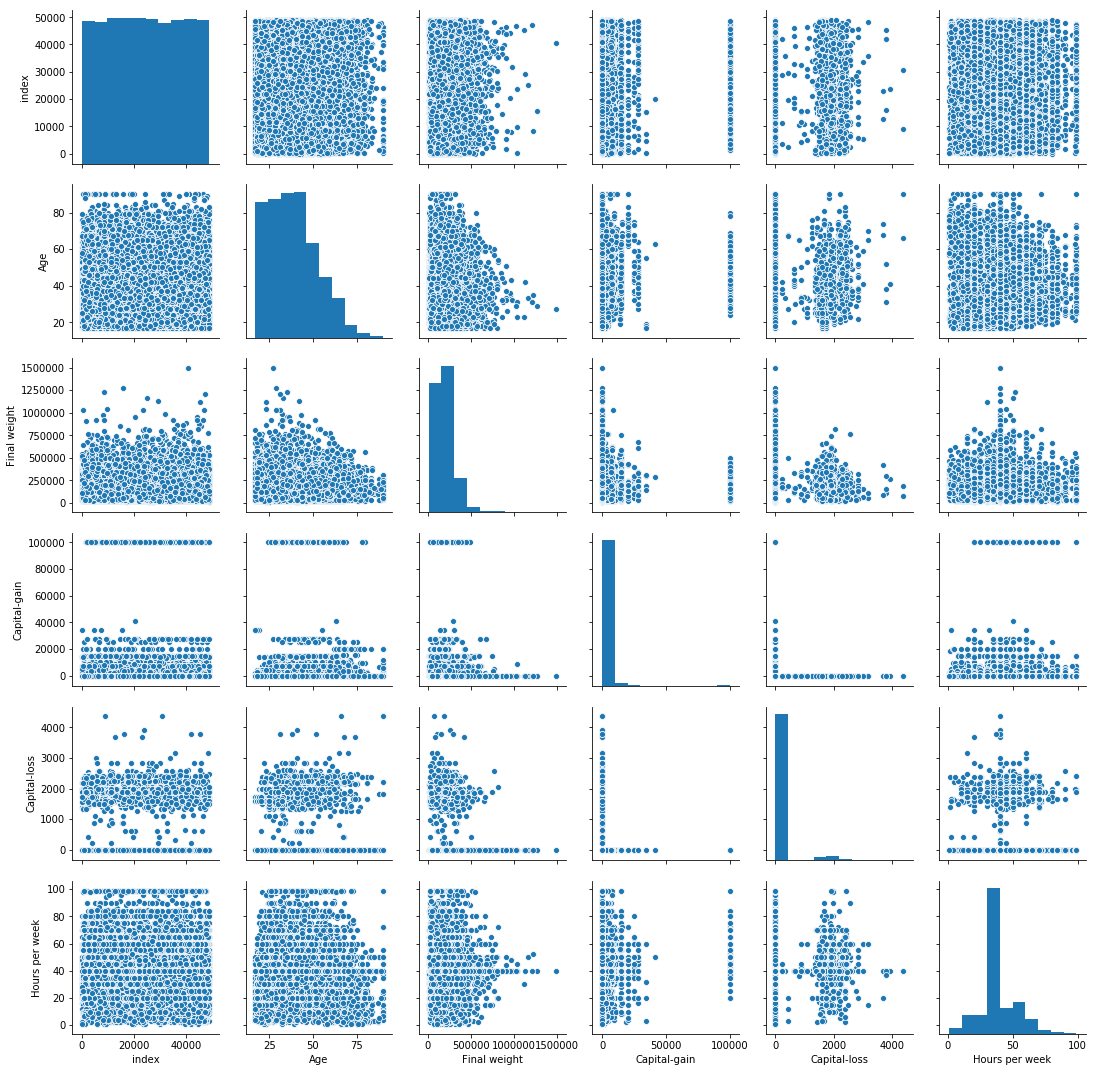

In [16]:
import seaborn as sns
sns.pairplot(X_train)

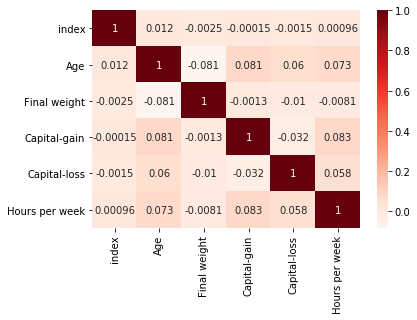

In [17]:
sns.heatmap(X_train.corr(), annot=True, cmap = "Reds")

C:\Users\Maha\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


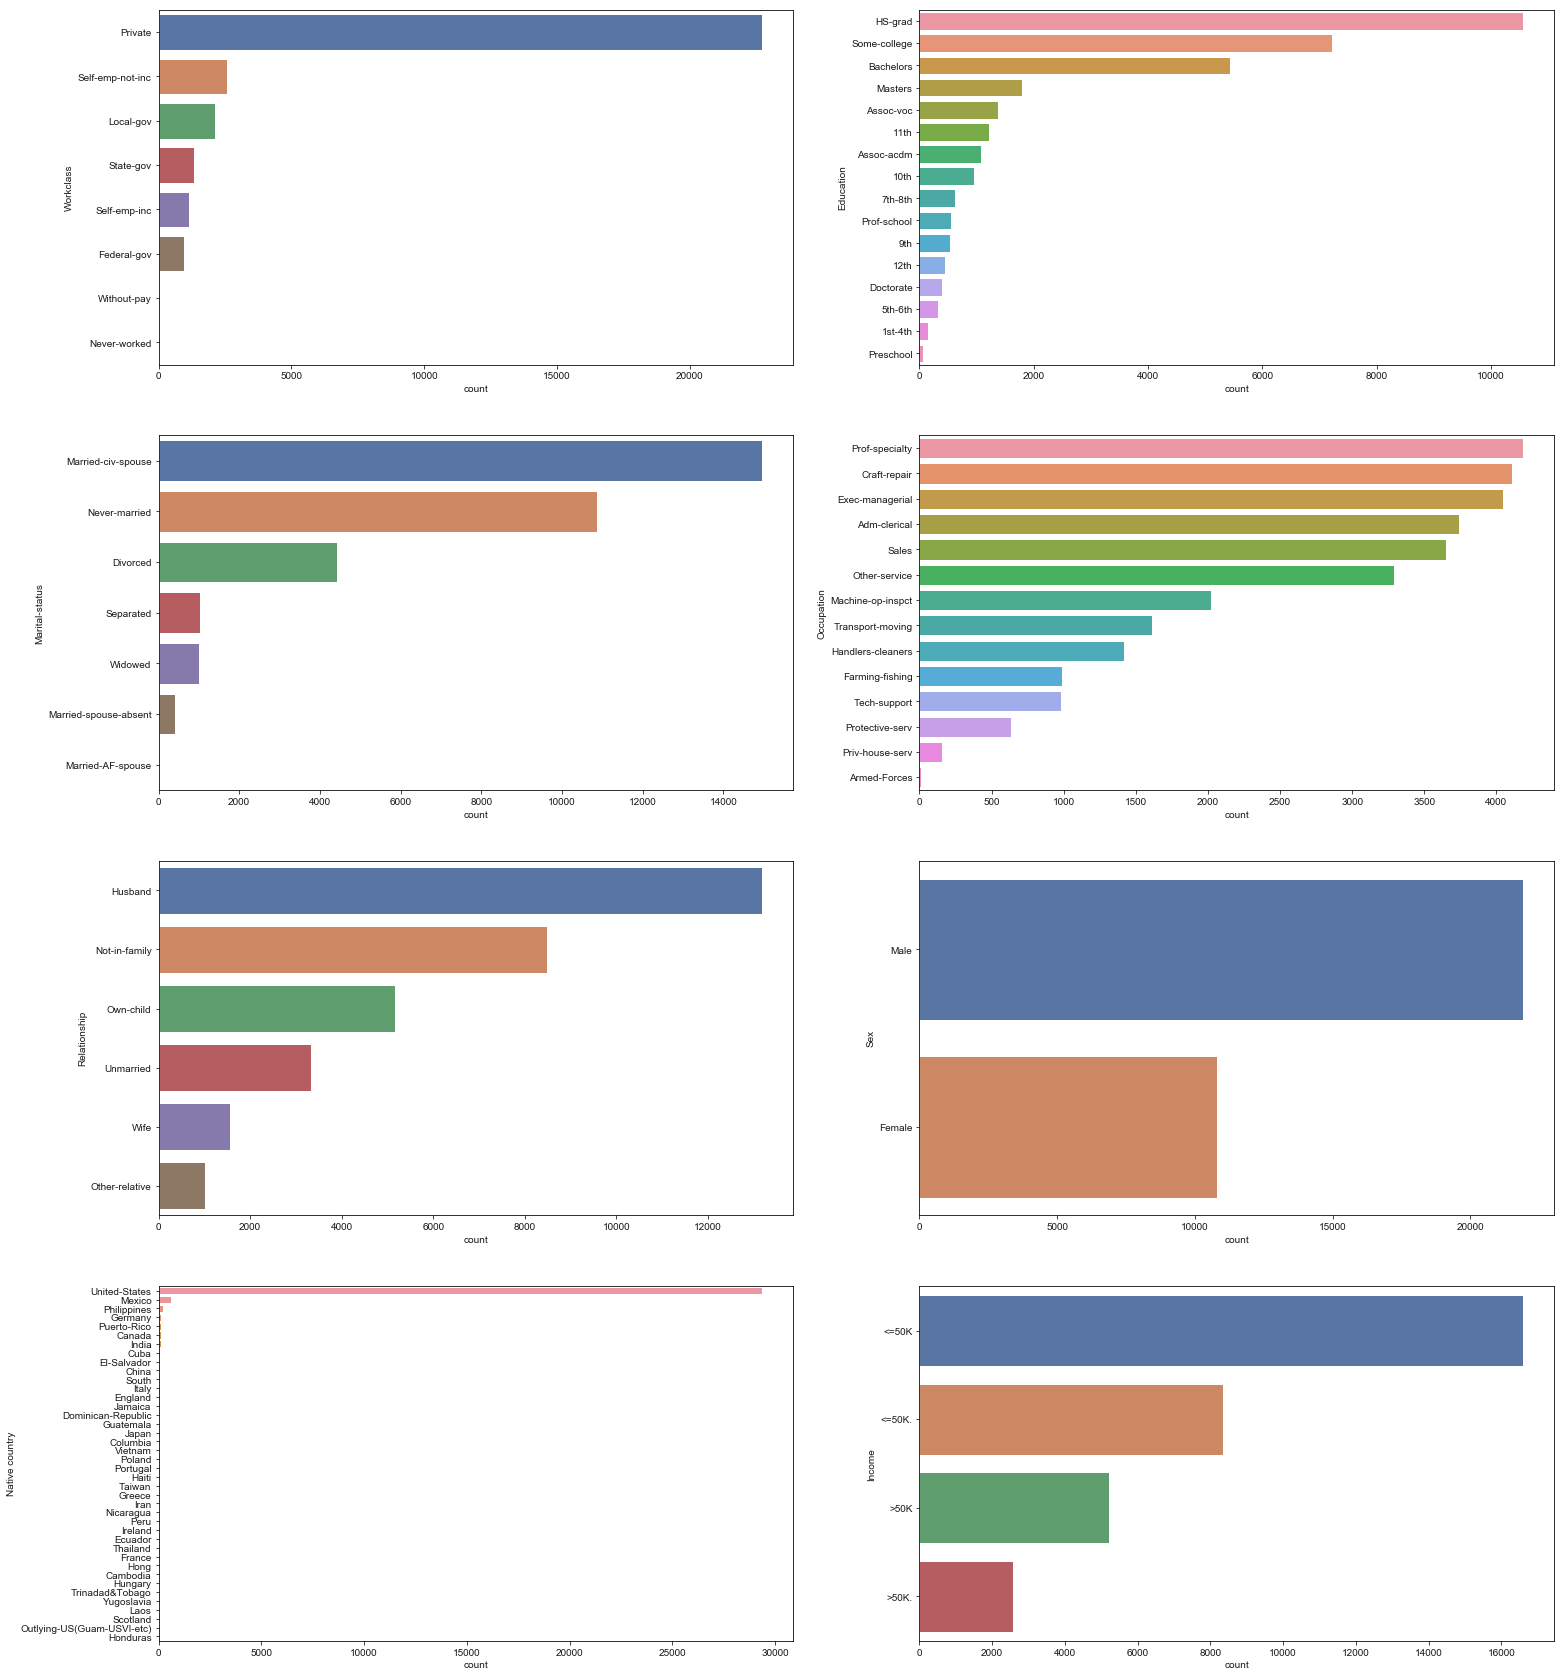

In [18]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,2, figsize=[25,30])
column = ["Workclass", "Education", "Marital-status", "Occupation", "Relationship", "Sex", "Native country", "Income"]
i = 0
for row in range(4):
    for col in range(2): 
        sns.set(style = "darkgrid")
        sns.countplot(y = column[i], data = data_train, ax = axes[row, col], order = data_train[column[i]].value_counts().index)
        i += 1
fig.show()

Data preprocessing


Column(s) | Transformation | Justification |
 :---: | :---: | :---: |
Index | Drop | It's not a feature |
Age | Standardization | It's a continuous feature which needs to be standardized so that it's centered around 0 and has  a standard deviation equal to 1. By doing so, we will only have values between -1 and 1 which means reducing all the features to the same scale |
Workclass | Replace missing values | The machine learning algorithms cannot deal with missing values. That's why, we decided to replace the missing values with the most frequent value which is "Private" (based on the histogram shown above, the workclass of nearly 70% of the observations is "Private") |
Workclass | One hot encoding | It's a categorical feature which must be encoded. We decided to use the one hot encoding, because, by doing so, we prevent the model from assuming a natural ordering between the different categories |
Final Weight | Drop | The income of a person cannot be related to the proportion of the population that this person represents |
Education | Combine classes | As we can see from the countplot above, the feature "Education" has a lot of unique classes, some of them with a very few number of observations. Those are called sparse classes and they can cause some problems like overfitting. That's why, we decided to combine those who never finished high-school (11th, 10th, 7th-8th, 9th, 12th, 5th-6th, 1st-4th, Preschool) into a single group called "Without HS diploma" and those who have an associate degree (Assoc-voc, Assoc-acdm) into a single group called "Associate"|
Education | One hot encoding | It's a categorical feature which must be encoded. We decided to use the one hot encoding, because, by doing so, we prevent the model from assuming a natural ordering between the different categories |
Marital-status | One hot encoding | It's a categorical feature which must be encoded. We decided to use the one hot encoding, because, by doing so, we prevent the model from assuming a natural ordering between the different categories |
Occupation | Replace missing values | The machine learning algorithms cannot deal with missing values. That's why, we decided to replace the missing values with the most frequent value which is "Prof-specialty" |
Occupation | One hot encoding | It's a categorical feature which must be encoded. We decided to use the one hot encoding, because, by doing so, we prevent the model from assuming a natural ordering between the different categories |
Relationship | Drop | It can be assessed from the columns sex and marital status |
Sex | One hot encoding | It's a categorical feature which must be encoded. We decided to use the one hot encoding, because, by doing so, we prevent the model from assuming a natural ordering between the different categories |
Capital-gain | Replace missing values | Based on the summary shown above, a value of 99999 seemed suspicious. That's why , we decided to consider it as a missing value and to replace it with the most frequent value which is 0 (based on the histogram shown above, we can see that more than 90% of the values are 0)| 
Capital-gain | Standardization | It's a continuous feature which needs to be standardized so that it's centered around 0 and has  a standard deviation equal to 1. By doing so, we will only have values between -1 and 1 which means reducing all the features to the same scale |
Capital-Loss | Standardization | It's a continuous feature which needs to be standardized so that it's centered around 0 and has  a standard deviation equal to 1. By doing so, we will only have values between -1 and 1 which means reducing all the features to the same scale |
Hours per week | Standardization | It's a continuous feature which needs to be standardized so that it's centered around 0 and has  a standard deviation equal to 1. By doing so, we will only have values between -1 and 1 which means reducing all the features to the same scale |
Native country | Replace missing values | The machine learning algorithms cannot deal with missing values. That's why, we decided to replace the missing values with the most frequent value which is "United-States" (based on the histogram shown above, the native country of nearly 90% of the observations is "United-States") |
Native country | Combine classes | As we can see from the countplot above, the feature "Native country" has a lot of unique classes, almost all of them with a very few number of observations except the "United-States". Those are called sparse classes and they can cause some problems like overfitting. Since nearly 90% of the observations come from the United-States, it would make more sense to reduce this feature to a binary variable which is true if the person comes from the United-States and false otherwise |
Native country | One hot encoding | It's a categorical feature which must be encoded. We decided to use the one hot encoding, because, by doing so, we prevent the model from assuming a natural ordering between the different categories |
Income | Remove points | We must also remove all the points from our label data, so that for example ">50k." and ">50K" will not be interpreted as two different categories |

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
## Wrapper pour vous aider pour les pipelines
class TransformationWrapper(BaseEstimator,TransformerMixin):
    
    def __init__(self,fitation= None, transformation = None): 
        
        self.transformation = transformation
        self.fitation = fitation
            
        
    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.data_ = None
        self.column_name_ = X.columns[0]
        if self.fitation == None:
            return self
        
        self.data_ = [self.fitation(X[self.column_name_])]
        return self  
    
    def transform(self, X, y=None): 
        X = pd.DataFrame(X)
        
        if self.data_ != None:
            return pd.DataFrame(X.apply(
                lambda row: pd.Series( self.transformation(row[self.column_name_], self.data_)),
                axis = 1
            ))
        else:
            return pd.DataFrame(X.apply(
                lambda row: pd.Series( self.transformation(row[self.column_name_])),
                axis = 1
            ))
        
        
from sklearn.preprocessing import LabelEncoder
class LabelEncoderP(LabelEncoder):
    def fit(self, X, y=None):
        super(LabelEncoderP, self).fit(X)
    def transform(self, X, y=None):
        return pd.DataFrame(super(LabelEncoderP, self).transform(X))
    def fit_transform(self, X, y=None):
        return super(LabelEncoderP, self).fit(X).transform(X)

In [20]:
# Implémenter ici les différentes transformations customs ici pour que cela soit plus claires (Si vous en avez)

def replaceMissingValues(data):
    if data == "99999":
        data = np.NaN 
    return data

def transformEducation(data):
    if (data == "Assoc-voc") or (data == "Assoc-acdm"):
        data = "Associate"
    elif (data == "11th") or (data == "10th") or (data == "7th-8th") or (data == "9th") \
    or (data == "12th") or (data == "5th-6th") or (data == "1st-4th") or (data == "Preschool"):
        data = "Without HS diploma"
    return data

def transformNativeCountry(data):
    if (data != "United-States"):
        data = "Non US"
    else:
        data = "US"
    return data

In [21]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Remove points from y_train
y_train = y_train.replace("<=50K.", "<=50K")
y_train = y_train.replace(">50K.", ">50K")

#Drop columns
index_test = pd.Series(X_test["index"])
X_train = X_train.drop(["index", "Final weight", "Relationship"], axis = 1)
X_test = X_test.drop(["index", "Final weight", "Relationship"], axis = 1)

pipeline_age = Pipeline([
    ("scaler", StandardScaler())
])

pipeline_workClass = Pipeline([
    ("fillna", SimpleImputer(strategy = "most_frequent", missing_values = np.NaN)),
    ("encodeWorkClass", OneHotEncoder(categories = "auto", sparse = False))
])

pipeline_education = Pipeline([
    ("transformEducation", TransformationWrapper(transformation = transformEducation)),
    ("encodeEducation", OneHotEncoder(categories = "auto", sparse = False))
])

pipeline_maritalStatus = Pipeline([
    ("encodeMaritalStatus", OneHotEncoder(categories = "auto", sparse = False))
])

pipeline_occupation = Pipeline([
    ("fillna", SimpleImputer(strategy = "most_frequent", missing_values = np.NaN)),
    ("encodeOccupation", OneHotEncoder(categories = "auto", sparse = False))
])

pipeline_sex = Pipeline([
    ("encodeSex", OneHotEncoder(categories = "auto", sparse = False))
])

pipeline_capitalGain = Pipeline([
    ("replaceMissingValues", TransformationWrapper(transformation = replaceMissingValues)),
    ("fillna", SimpleImputer(strategy = "most_frequent", missing_values = np.NaN)),
    ("scaler", StandardScaler())
])

pipeline_capitalLoss = Pipeline([
    ("scaler", StandardScaler())
])

pipeline_hoursPerWeek = Pipeline([
    ("scaler", StandardScaler())
])

pipeline_nativeCountry = Pipeline([
    ("replaceMissingValues", TransformationWrapper(transformation = replaceMissingValues)),
    ("fillna", SimpleImputer(strategy = "most_frequent", missing_values = np.NaN)),
    ("transformNativeCountry", TransformationWrapper(transformation = transformNativeCountry)),
    ("encodeNativeCountry", OneHotEncoder(categories = "auto", sparse = False))
])

full_pipeline = ColumnTransformer([
    ("Age", pipeline_age, ["Age"]),
    ("Workclass", pipeline_workClass, ["Workclass"]),
    ("Education", pipeline_education, ["Education"]),
    ("Marital-status", pipeline_maritalStatus, ["Marital-status"]),
    ("Occupation", pipeline_occupation, ["Occupation"]),
    ("Sex", pipeline_sex, ["Sex"]),
    ("Capital-gain", pipeline_capitalGain, ["Capital-gain"]),
    ("Capital-loss", pipeline_capitalLoss, ["Capital-loss"]),
    ("Hours per week", pipeline_hoursPerWeek, ["Hours per week"]),
    ("Native country", pipeline_nativeCountry, ["Native country"]),
])

In [22]:
# TODO ajouter les noms des colonnes selon le nouvel ordre du pipeline
X_train_preprocess = pd.DataFrame(full_pipeline.fit_transform(X_train))
X_test_preprocess = pd.DataFrame(full_pipeline.transform(X_test))
column_names = np.concatenate((["Age"],
                               full_pipeline.transformers_[1][1]["encodeWorkClass"].get_feature_names(["Workclass"]),
                               full_pipeline.transformers_[2][1]["encodeEducation"].get_feature_names(["Education"]),
                               full_pipeline.transformers_[3][1]["encodeMaritalStatus"].get_feature_names(["MaritalStatus"]),
                               full_pipeline.transformers_[4][1]["encodeOccupation"].get_feature_names(["Occupation"]),
                               full_pipeline.transformers_[5][1]["encodeSex"].get_feature_names(["Sex"]),
                               ["Capital-gain"],
                               ["Capital-loss"],
                               ["Hours per week"],
                               full_pipeline.transformers_[9][1]["encodeNativeCountry"].get_feature_names(["NativeCountry"])
                              ), axis = 0)
X_train_preprocess.columns = column_names
X_test_preprocess.columns = column_names

In [23]:
X_train.head()

,Age,Workclass,Education,Marital-status,Occupation,Sex,Capital-gain,Capital-loss,Hours per week,Native country
0,36,Private,Masters,Married-civ-spouse,Exec-managerial,Male,0,0,50,United-States
1,52,NaN,Assoc-voc,Married-civ-spouse,NaN,Male,0,0,50,United-States
2,36,Private,Assoc-voc,Divorced,Craft-repair,Male,0,0,40,United-States
3,42,Self-emp-inc,Bachelors,Married-civ-spouse,Sales,Male,0,0,60,United-States
4,44,Private,Bachelors,Never-married,Other-service,Male,0,0,48,United-States


In [24]:
X_train_preprocess.head()

,Age,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_Associate,...,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Sex_Female,Sex_Male,Capital-gain,Capital-loss,Hours per week,NativeCountry_Non US,NativeCountry_US
0,-0.190154,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.146117,-0.218564,0.774580,0.0,1.0
1,0.974165,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,-0.146117,-0.218564,0.774580,0.0,1.0
2,-0.190154,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,-0.146117,-0.218564,-0.030764,0.0,1.0
3,0.246465,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.146117,-0.218564,1.579923,0.0,1.0
4,0.392005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.146117,-0.218564,0.613511,0.0,1.0


In [25]:
X_test.head()

,Age,Workclass,Education,Marital-status,Occupation,Sex,Capital-gain,Capital-loss,Hours per week,Native country
0,18,Private,HS-grad,Never-married,Other-service,Male,0.0,0.0,20.0,United-States
1,17,Private,12th,Never-married,Sales,Female,0.0,0.0,20.0,United-States
2,25,Local-gov,HS-grad,Never-married,Handlers-cleaners,Male,0.0,0.0,40.0,United-States
3,20,Private,Some-college,Never-married,Sales,Female,0.0,0.0,30.0,United-States
4,47,Private,HS-grad,Never-married,Machine-op-inspct,Male,0.0,0.0,56.0,Puerto-Rico


In [26]:
X_test_preprocess.head()

,Age,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_Associate,...,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Sex_Female,Sex_Male,Capital-gain,Capital-loss,Hours per week,NativeCountry_Non US,NativeCountry_US
0,-1.500012,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.146117,-0.218564,-1.641450,0.0,1.0
1,-1.572782,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.146117,-0.218564,-1.641450,0.0,1.0
2,-0.990623,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.146117,-0.218564,-0.030764,0.0,1.0
3,-1.354473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.146117,-0.218564,-0.836107,0.0,1.0
4,0.610315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.146117,-0.218564,1.257786,1.0,0.0


# Model selection

In [27]:
from sklearn.preprocessing import LabelEncoder
target_label = LabelEncoder()
y_train_label = target_label.fit_transform(y_train)
print(target_label.classes_)

['<=50K' '>50K']


In [28]:
y_train.head()

0     >50K
1     >50K
2    <=50K
3     >50K
4    <=50K
Name: Income, dtype: object

In [29]:
y_train_label[0:5]

array([1, 1, 0, 1, 0])

In [30]:
from sklearn.model_selection import cross_validate
def compare(models,X_train,y_train,nb_runs,scoring):
    scores = []
    for i, model in enumerate(models):
        cv_score = cross_validate(model, X_train, y_train, cv = nb_runs, scoring = scoring)
        score = {}
        for key in scoring:
            meanValue, sdValue = np.mean(cv_score["test_"+key]), np.std(cv_score["test_"+key])
            score[key] = (meanValue, sdValue)
        scores.append(score)
    return scores

In [129]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

nb_run = 3

sc = SoftmaxClassifier() # le modele que vous avez implémenté plus haut
rfc = RandomForestClassifier(n_estimators = 500, max_depth = 32, min_samples_split = 10, random_state = 0)
xgbc = XGBClassifier(max_depth = 3, min_child_weight = 1, learning_rate = 0.1, n_estimators = 1000, subsample = 0.8, 
                     colsample_bytree = 0.8)

models = [sc, rfc, xgbc]

scoring = ['neg_log_loss', 'precision_macro','recall_macro','f1_macro']

compare(models,X_train_preprocess,y_train_label,nb_run, scoring)

[{'neg_log_loss': (-0.3267050698541411, 0.0022258004446199585),
  'precision_macro': (0.8042607313869317, 0.0028980052573662923),
  'recall_macro': (0.7530243087301803, 0.0012859996522335084),
  'f1_macro': (0.7730289797230515, 0.001452865479404563)},
 {'neg_log_loss': (-0.3119996369445404, 0.0038666628532906034),
  'precision_macro': (0.8179157732956224, 0.002007465592383816),
  'recall_macro': (0.772297010325005, 0.003941343994056284),
  'f1_macro': (0.7908520662312034, 0.0023153978332479588)},
 {'neg_log_loss': (-0.2795864610051158, 0.0009480832770539795),
  'precision_macro': (0.8335282774470123, 0.0035613774768324044),
  'recall_macro': (0.7939995780060477, 0.0015707022128035961),
  'f1_macro': (0.8107647207298898, 0.0014421097699945321)}]

# Hyperparameter tuning

In [25]:
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    nthread = -1,
    seed = 0,
    missing = None
)

parameters = {
    'learning_rate': [0.1, 0.05, 0.01],
    'min_child_weight': [1, 5, 10],
    'max_depth': range(2, 10, 2),
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'n_estimators': range(100, 1000, 300),    
}

grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = parameters,
    scoring = 'f1_macro',
    n_jobs = -1,
    cv = 5,
    verbose = True
)

grid_search.fit(X_train_preprocess, y_train_label)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 82.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 124.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 180.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 254.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 335.5min
[Parallel(n_jobs=-1)]: Done 4860 out of 4860 | elapsed: 435.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='logloss',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=-1,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, r...
                                     scale_pos_weight=1, seed=0, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
          

In [26]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=0.9, verbosity=1)

# Confusion matrix

In [33]:
# Train selected model
selected_model = XGBClassifier(base_score = 0.5, booster = 'gbtree', colsample_bylevel = 1, colsample_bynode = 1,
                               colsample_bytree = 0.5, eval_metric = 'logloss', gamma = 0, learning_rate = 0.05,
                               max_delta_step = 0, max_depth = 8, min_child_weight = 1, missing = None,
                               n_estimators = 400, n_jobs = 1, nthread = -1, objective = 'binary:logistic',
                               random_state = 0, reg_alpha = 0, reg_lambda = 1, scale_pos_weight = 1, seed = 0,
                               silent = None, subsample = 0.9, verbosity = 1)
selected_model.fit(X_train_preprocess,y_train_label)
y_pred = selected_model.predict(X_train_preprocess)

In [34]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_train_label, y_pred), columns = target_label.classes_, 
             index = target_label.classes_)

,<=50K,>50K
<=50K,23815,1134
>50K,2321,5453


# Classes distribution

['<=50K' '>50K']


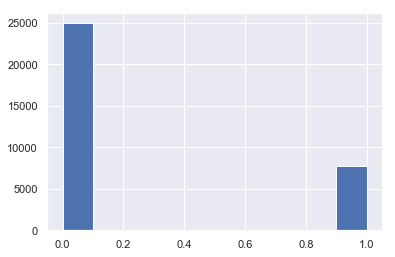

In [35]:
import matplotlib.pyplot as plt 
print(target_label.classes_)
pd.Series(y_train_label).hist()